### K- Means Clustering Algorithm Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # generate isotropic gaussian blobs for clustering 
%matplotlib inline 

In [2]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [3]:
X # Independent features (2 features)

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [4]:
y   # dependent features 

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

#### we are using unsupervised learning so we will only use independent variables and leave dependent features
Our aim here is to cluster the datapoints 

In [6]:
# # scatter plot 
# plt.scatter(X[:,0],X[:,1],c=y)  # getting 3 clusters 

#### As we know we dont have y value so will make clusters on our own 

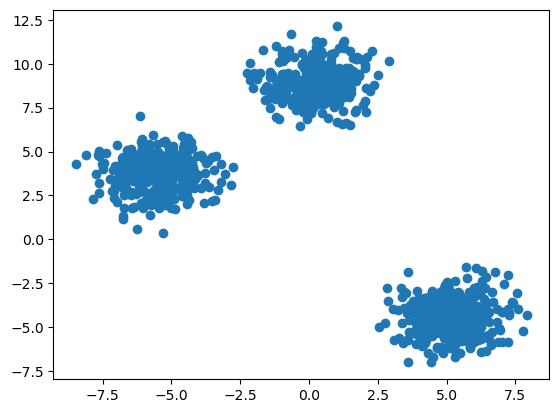

In [9]:
# scatter plot
plt.scatter(X[:,0],X[:,1])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.cluster import KMeans

#### we will use elbow method to find out how many clusters do we have for that we will find within clusters sum of square 

In [15]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)  # this inertia contains the wcss value

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [16]:
wcss  # the wcss is getting reduced when we increase the k value 

[34827.576825520206,
 7935.437286145417,
 1319.2730531585603,
 1140.4677884655127,
 1001.9871663121587,
 853.5719411208648,
 757.7798862850016,
 671.0495225148969,
 577.9381616442199,
 534.3042657139546]

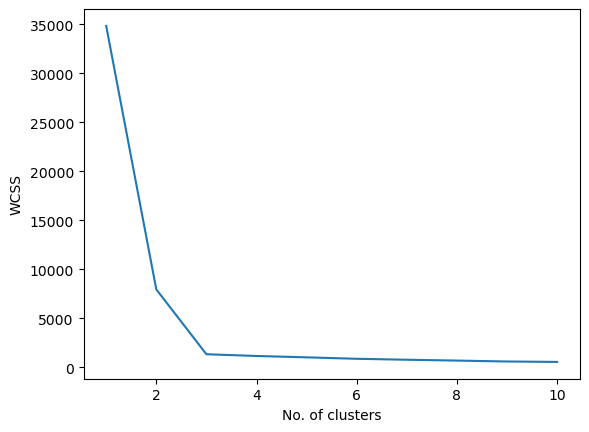

In [17]:
# to determine the k value we will use the elbow curve plotting
plt.plot(range(1,11),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

#### Observation: the k=3 is perfect for this problem

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [20]:
y_labels=kmeans.fit_predict(X_train)  # we get the label here

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


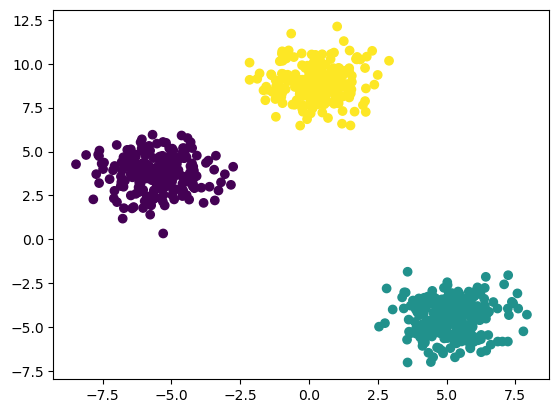

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

#### We are doing this k-means algo by manually 
There is a knee locator in the python (similar to elbow method) as on huge datasets elbow method will become dificult to interpret

In [23]:
# knee locator 
!pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [25]:
from kneed import KneeLocator

In [27]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')  
# it will check for all k values till 10 , 
# wcss is already computed above, 
# wcss is kept on decresing so it has convex curve (whenever value reducing then it is convex)
# decreasing because our wcss value is decresing 

In [28]:
k1.elbow

3

### Silhoutte score (it is our performance matrix to validate the model)
range is between -1 to +1 

more near to +1 means model is more goodly clustered

In [29]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [32]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33886792524096065,
 0.3451642252122387,
 0.34220598722736517,
 0.34485772409529497,
 0.34256414842349187]

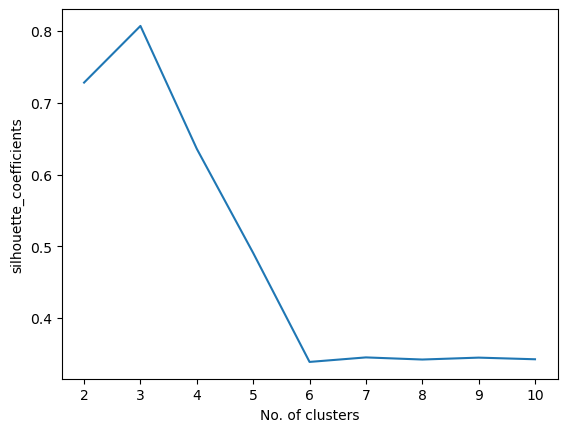

In [34]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xlabel('No. of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

### Observation
The highest silhoutte_coef is 80.71 after plotting we can find at K=3 the silhoutte_coef value is higher.
so 3 clusters is better for this problems